# COVID-19 Choropleth Maps 
## Author: Anand Padmanabhan, University of Illinois at Urbana Champaign

In this notebook we are doing a simple visualization creating Choropleth Maps at county level. For this example we are using data released by Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports) for March 30, 2020 and the US county dataset (https://www.arcgis.com/home/item.html?id=a00d6b6149b34ed3b833e10fb72ef47b). This notebook creates choropleth maps of confirmed cases, deaths, cases per-capita and deaths per-capita for all of USA, continental US, and Illinois.

## Notebook Outline:
- [Setup](#setup) (run this first!)
- [Preparing Data](#data)
- [Join COVID with county geometry data](#join)
- [Mapping COVID-19 Data](#map)

<a id="setup"></a>
## Setup

In [47]:
# import required libraries

import os
import fiona
# pretty printing - makes some kinds of text output easier to read
import pprint
import IPython
from matplotlib import pyplot as plt

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
%matplotlib inline


<a id="data"></a>
## Preparing Data

In [119]:
!wget https://ndownloader.figshare.com/files/22156113?private_link=2f0d5e4d3807a40c5702 -O USA_Counties_as_Shape.zip

--2020-03-31 23:48:03--  https://ndownloader.figshare.com/files/22156113?private_link=2f0d5e4d3807a40c5702
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 63.33.146.135, 18.203.214.185, 34.246.188.184, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|63.33.146.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102002013 (97M) [application/zip]
Saving to: ‘USA_Counties_as_Shape.zip’

USA_Counties_as_Sha 100%[===================>]  97.28M  23.9MB/s    in 4.7s    

2020-03-31 23:48:09 (20.6 MB/s) - ‘USA_Counties_as_Shape.zip’ saved [102002013/102002013]



In [122]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv -O 03-30-2020.csv

--2020-03-31 23:50:52--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 351850 (344K) [text/plain]
Saving to: ‘03-30-2020.csv’

03-30-2020.csv      100%[===================>] 343.60K  --.-KB/s    in 0.02s   

2020-03-31 23:50:52 (20.2 MB/s) - ‘03-30-2020.csv’ saved [351850/351850]



In [123]:
# import county database
county_gpd = gpd.read_file('zip://./USA_Counties_as_Shape.zip')

In [124]:
#Import one day of data from the Johns Hopkins University
oneday_df = pd.read_csv('./03-30-2020.csv')

In [125]:
#Keep only US Data
select_us= oneday_df.dropna()

In [126]:
county_gpd['STATE_FIPS']=county_gpd['STATE_FIPS'].astype(int)

In [127]:
# Drop data of US territories
county_gpd  = county_gpd.loc[county_gpd['STATE_FIPS'] <= 56]

In [128]:
select_us.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-30 22:52:45,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-30 22:52:45,30.295065,-92.414197,11,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-30 22:52:45,37.767072,-75.632346,6,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-30 22:52:45,43.452658,-116.241552,113,2,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-30 22:52:45,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [129]:
select_us['FIPS']=select_us['FIPS'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
county_gpd['FIPS']=county_gpd['FIPS'].astype(int)

In [131]:
county_gpd.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,...,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,geometry
0,Autauga,Alabama,1,001,1001,54571,90.3,55939,92.594309,42855,...,15248,4973,415.0,266.0,42349.0,40.41,604.13,2.137933,0.150198,"MULTIPOLYGON (((-86.41130 32.42699, -86.41138 ..."
1,Baldwin,Alabama,1,003,1003,182265,111.1,190116,115.901069,156153,...,53071,20109,1139.0,167.0,103036.0,88.09,1640.33,6.693000,0.400159,"MULTIPOLYGON (((-87.55692 30.28155, -87.55693 ..."
2,Barbour,Alabama,1,005,1005,27457,30.4,27310,30.193811,13180,...,6556,3264,623.0,320.0,56934.0,114.63,904.49,2.690975,0.223268,"POLYGON ((-85.25782 32.14797, -85.25835 32.146..."
3,Bibb,Alabama,1,007,1007,22915,36.6,23106,36.899933,17381,...,6011,1942,211.0,181.0,8619.0,-99.00,626.18,1.895169,0.156477,"POLYGON ((-87.02587 33.22258, -87.02585 33.220..."
4,Blount,Alabama,1,009,1009,57322,88.1,58107,89.308824,53068,...,17384,4194,1414.0,107.0,46735.0,113.33,650.63,2.452748,0.164407,"MULTIPOLYGON (((-86.83831 33.95018, -86.83833 ..."


In [132]:
select_us.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001,Abbeville,South Carolina,US,2020-03-30 22:52:45,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-03-30 22:52:45,30.295065,-92.414197,11,1,0,0,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-03-30 22:52:45,37.767072,-75.632346,6,0,0,0,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-03-30 22:52:45,43.452658,-116.241552,113,2,0,0,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-03-30 22:52:45,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


<a id="join"></a>
## Join COVID with county geometry data

In [133]:
county_covid = county_gpd.merge(
    select_us, on='FIPS')

In [134]:
county_covid.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,...,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,Autauga,Alabama,1,001,1001,54571,90.3,55939,92.594309,42855,...,Alabama,US,2020-03-30 22:52:45,32.539527,-86.644082,6,0,0,0,"Autauga, Alabama, US"
1,Baldwin,Alabama,1,003,1003,182265,111.1,190116,115.901069,156153,...,Alabama,US,2020-03-30 22:52:45,30.727750,-87.722071,18,1,0,0,"Baldwin, Alabama, US"
2,Barbour,Alabama,1,005,1005,27457,30.4,27310,30.193811,13180,...,Alabama,US,2020-03-30 22:52:45,31.868263,-85.387129,0,0,0,0,"Barbour, Alabama, US"
3,Bibb,Alabama,1,007,1007,22915,36.6,23106,36.899933,17381,...,Alabama,US,2020-03-30 22:52:45,32.996421,-87.125115,2,0,0,0,"Bibb, Alabama, US"
4,Blount,Alabama,1,009,1009,57322,88.1,58107,89.308824,53068,...,Alabama,US,2020-03-30 22:52:45,33.982109,-86.567906,5,0,0,0,"Blount, Alabama, US"


In [135]:
#Change data types so you can do comparisons
county_covid['Lat']=county_covid['Lat'].astype(float)
county_covid['Long_']=county_covid['Long_'].astype(float)


<a id="map"></a>
# Mapping COVID-19 Data

## Choropleth map of confirmed cases

### Continental US

In [136]:
county_covid_cont=county_covid

In [137]:
# Continental USBound: -126.562500,24.046464,-65.390625,49.610710
county_covid_cont  = county_covid_cont.loc[county_covid_cont['Lat'] <= 49.610710]
county_covid_cont  = county_covid_cont.loc[county_covid_cont['Lat'] >= 24.046464]

county_covid_cont  = county_covid_cont.loc[county_covid_cont['Long_'] <= -65.390625]
county_covid_cont  = county_covid_cont.loc[county_covid_cont['Long_'] >= -126.562500]

Text(0.5, 1, 'Number of Confirmed Cases')

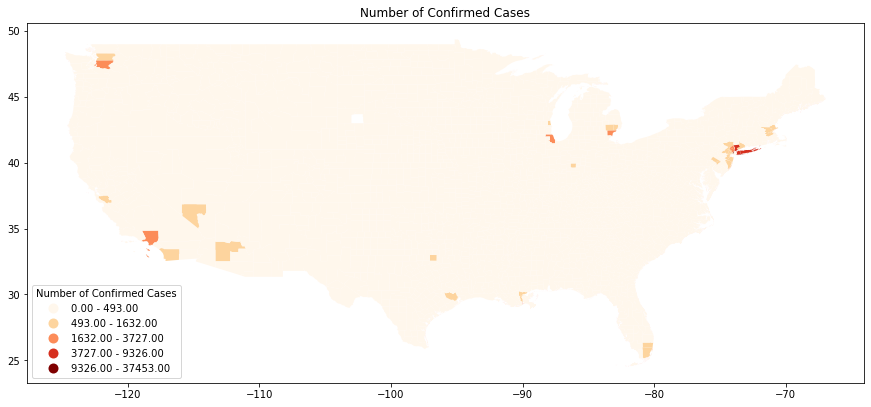

In [141]:
county_covid_cont.plot(figsize=(15, 15), column='Confirmed', cmap='OrRd', scheme='fisher_jenks', legend="true", 
                       legend_kwds={'loc': 'lower left', 'title':'Number of Confirmed Cases'})
plt.title("Number of Confirmed Cases")

### Map Including Alaska and Hawaii

Text(0.5, 1, 'Number of Confirmed Cases')

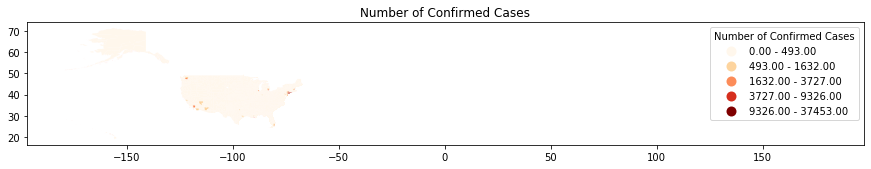

In [154]:
county_covid.plot(figsize=(15, 15), column='Confirmed', cmap='OrRd', scheme='fisher_jenks', 
                  legend="true",legend_kwds={'loc': 'best', 'title':'Number of Confirmed Cases'})
plt.title("Number of Confirmed Cases")

### Map of Illinois

In [102]:
#-91.513079	36.970298	-87.494756	42.508481
county_covid_il = county_covid.loc[county_covid['STATE_FIPS'] == 17]

Text(0.5, 1, 'Number of Confirmed Cases')

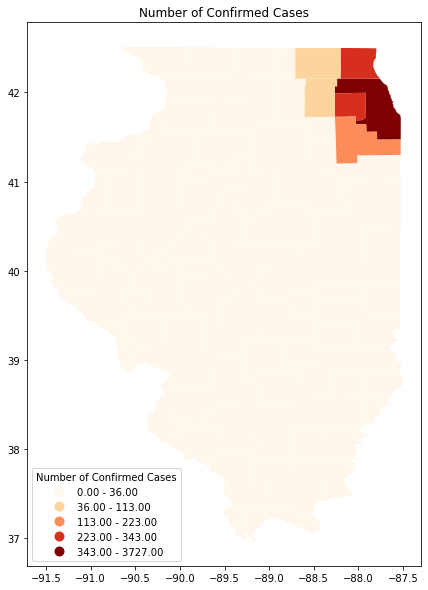

In [143]:
county_covid_il.plot(figsize=(10, 10), column='Confirmed', cmap='OrRd', scheme='fisher_jenks', legend="true",  
                     legend_kwds={'loc': 'lower left','title':'Number of Confirmed Cases'})
plt.title("Number of Confirmed Cases")

## Choropleth map of deaths 

Text(0.5, 1, 'Number of Deaths')

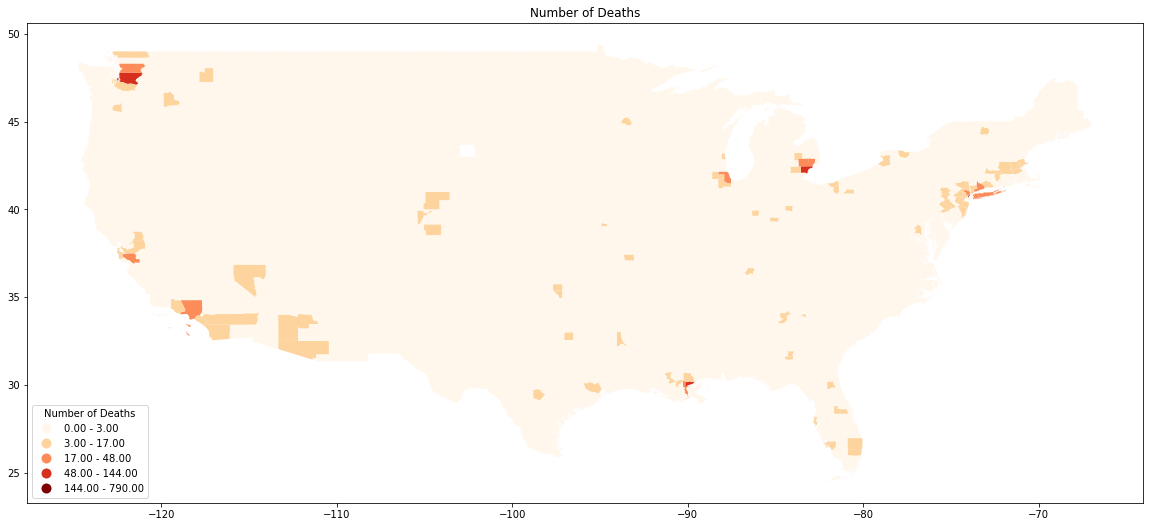

In [146]:
county_covid_cont.plot(figsize=(20, 10), column='Deaths', cmap='OrRd', scheme='fisher_jenks', legend="true",
                      legend_kwds={'loc': 'lower left','title':'Number of Deaths'})
plt.title("Number of Deaths")

### Map Including Alaska and Hawaii

Text(0.5, 1, 'Number of Deaths')

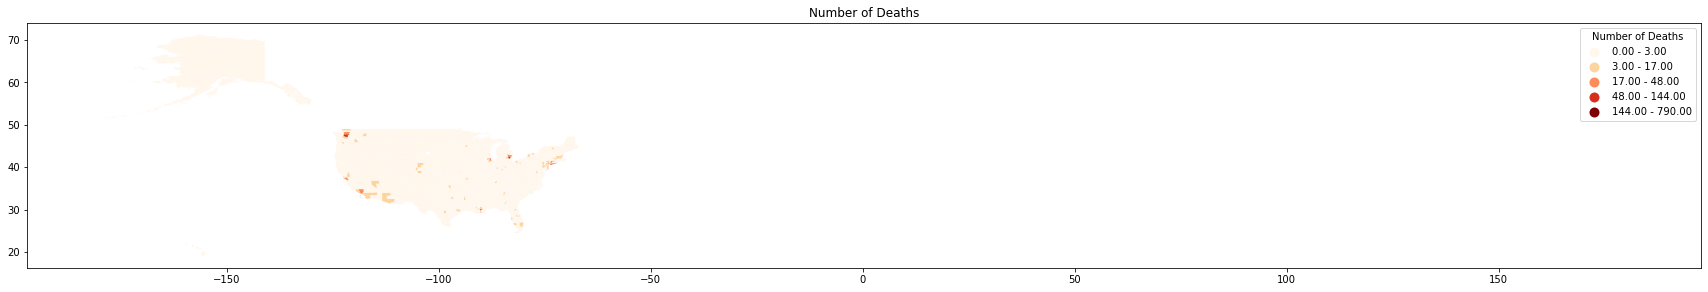

In [151]:
county_covid.plot(figsize=(30, 30), column='Deaths', cmap='OrRd', scheme='fisher_jenks', legend="true",
                  legend_kwds={'loc': 'best','title':'Number of Deaths'})
plt.title("Number of Deaths")

### Map of Illinois

Text(0.5, 1, 'Number of Deaths')

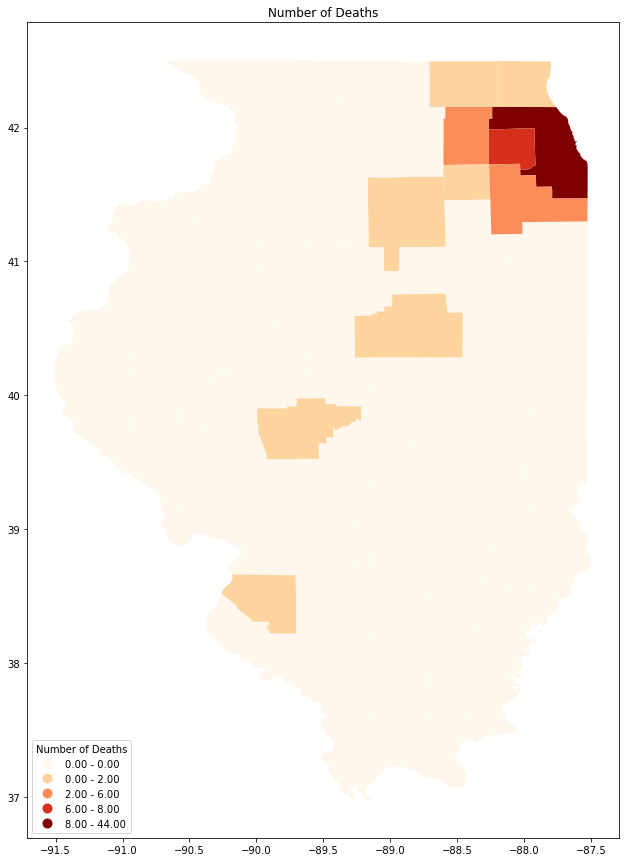

In [152]:
county_covid_il.plot(figsize=(20, 15), column='Deaths', cmap='OrRd', scheme='fisher_jenks', legend="true",
                    legend_kwds={'loc': 'lower left','title':'Number of Deaths'} )
plt.title("Number of Deaths")

## Choropleth map of per-capita confirmed cases 

In [161]:
county_covid_cont['Confirmed_per_capita']=county_covid_cont['Confirmed']*1000000/county_covid_cont['POP2012']

Text(0.5, 1, 'Confirmed cases per Million population')

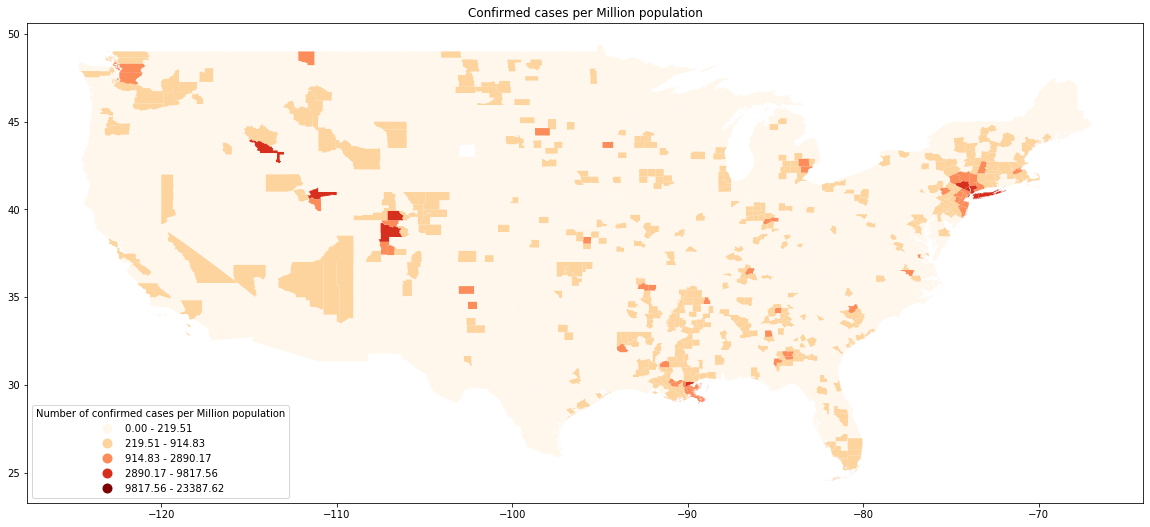

In [164]:
county_covid_cont.plot(figsize=(20, 10), column='Confirmed_per_capita', cmap='OrRd', scheme='fisher_jenks', 
                       legend="true",
                       legend_kwds={'loc': 'lower left','title':'Number of confirmed cases per Million population'})
plt.title("Confirmed cases per Million population")

### Map Including Alaska and Hawaii

In [168]:
county_covid['Confirmed_per_capita']=county_covid['Confirmed']*1000000/county_covid['POP2012']

Text(0.5, 1, 'Confirmed cases per Million population')

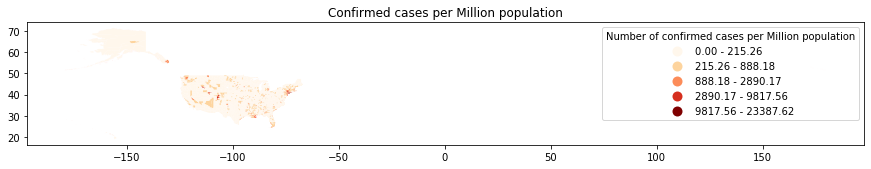

In [169]:
county_covid.plot(figsize=(15, 10), column='Confirmed_per_capita', cmap='OrRd', scheme='fisher_jenks', legend="true",
                 legend_kwds={'loc': 'best','title':'Number of confirmed cases per Million population'})
plt.title("Confirmed cases per Million population")


### Map of Illinois

In [170]:
county_covid_il['Confirmed_per_capita']=county_covid_il['Confirmed']*1000000/county_covid_il['POP2012']

Text(0.5, 1, 'Confirmed cases per Million population')

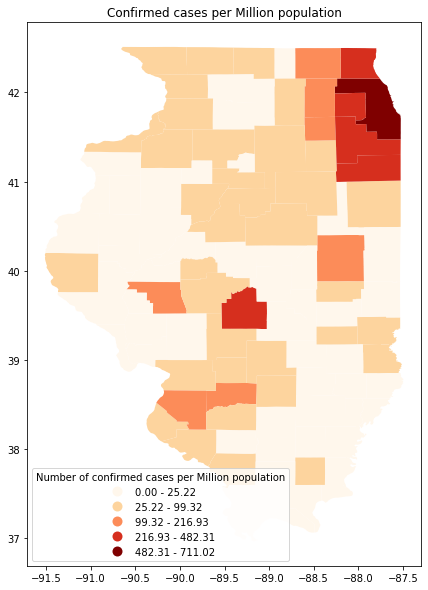

In [172]:
county_covid_il.plot(figsize=(20, 10), column='Confirmed_per_capita', cmap='OrRd', scheme='fisher_jenks', 
                     legend="true",
                    legend_kwds={'loc': 'lower left','title':'Number of confirmed cases per Million population'})
plt.title("Confirmed cases per Million population")

## Choropleth map of per-capita deaths 

In [173]:
county_covid_cont['Deaths_per_capita']=county_covid_cont['Deaths']*1000000/county_covid_cont['POP2012']

Text(0.5, 1, 'Deaths per Million population')

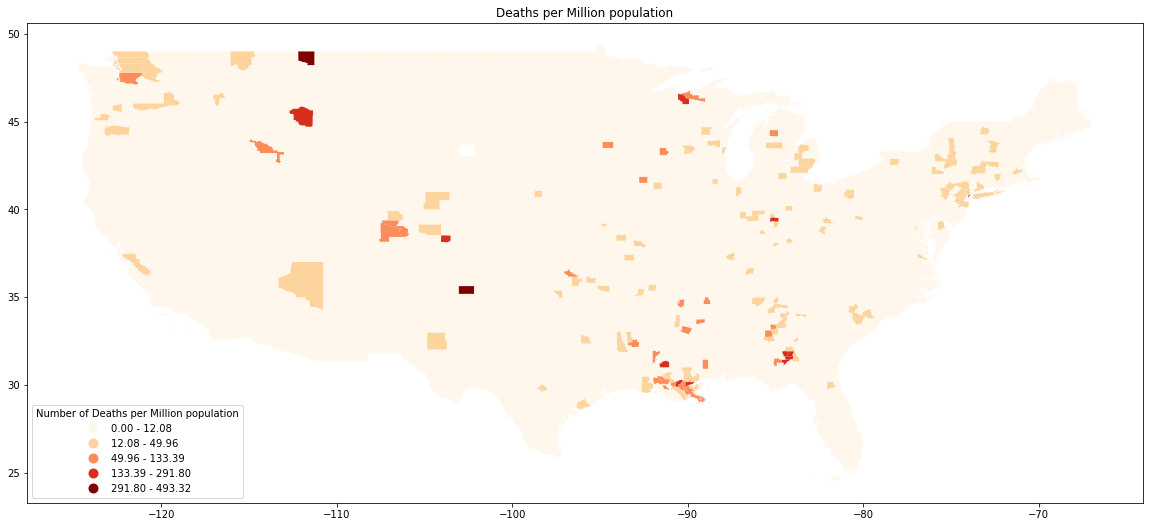

In [174]:
county_covid_cont.plot(figsize=(20, 10), column='Deaths_per_capita', cmap='OrRd', scheme='fisher_jenks', 
                       legend="true",
                      legend_kwds={'loc': 'lower left','title':'Number of Deaths per Million population'})
plt.title("Deaths per Million population")

### Map Including Alaska and Hawaii

In [176]:
county_covid['Deaths_per_capita']=county_covid['Deaths']*1000000/county_covid['POP2012']

Text(0.5, 1, 'Deaths per Million population')

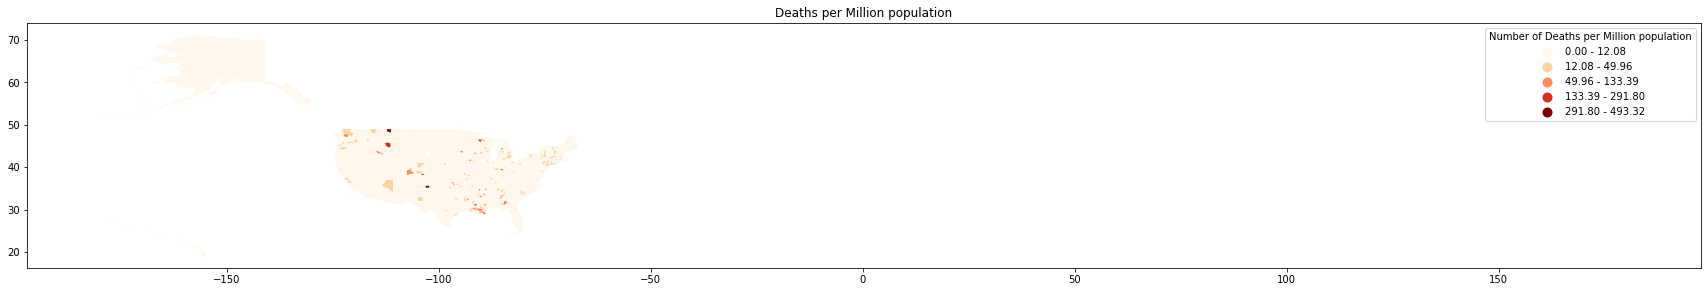

In [178]:
county_covid.plot(figsize=(30, 30), column='Deaths_per_capita', cmap='OrRd', scheme='fisher_jenks', legend="true",
                     legend_kwds={'loc': 'best','title':'Number of Deaths per Million population'})
plt.title("Deaths per Million population")

### Map of Illinois

In [80]:
county_covid_il['Deaths_per_capita']=county_covid_il['Deaths']*1000000/county_covid_il['POP2012']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Deaths per Million population')

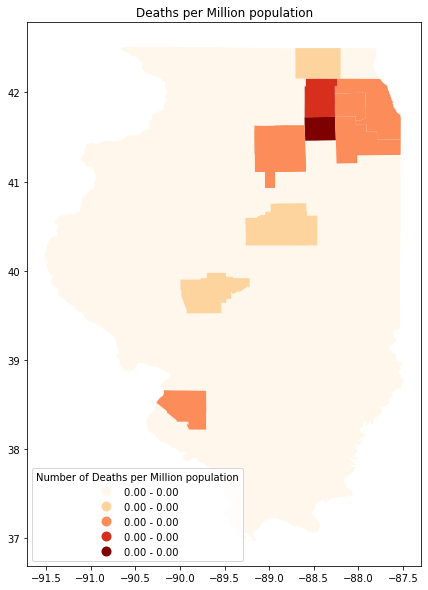

In [179]:
county_covid_il.plot(figsize=(20, 10), column='Deaths_per_capita', cmap='OrRd', scheme='fisher_jenks', legend="true",
                        legend_kwds={'loc': 'lower left','title':'Number of Deaths per Million population'})
plt.title("Deaths per Million population")